Dataset shape: (569, 32)
diagnosis
benign       357
malignant    212
Name: count, dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.03880

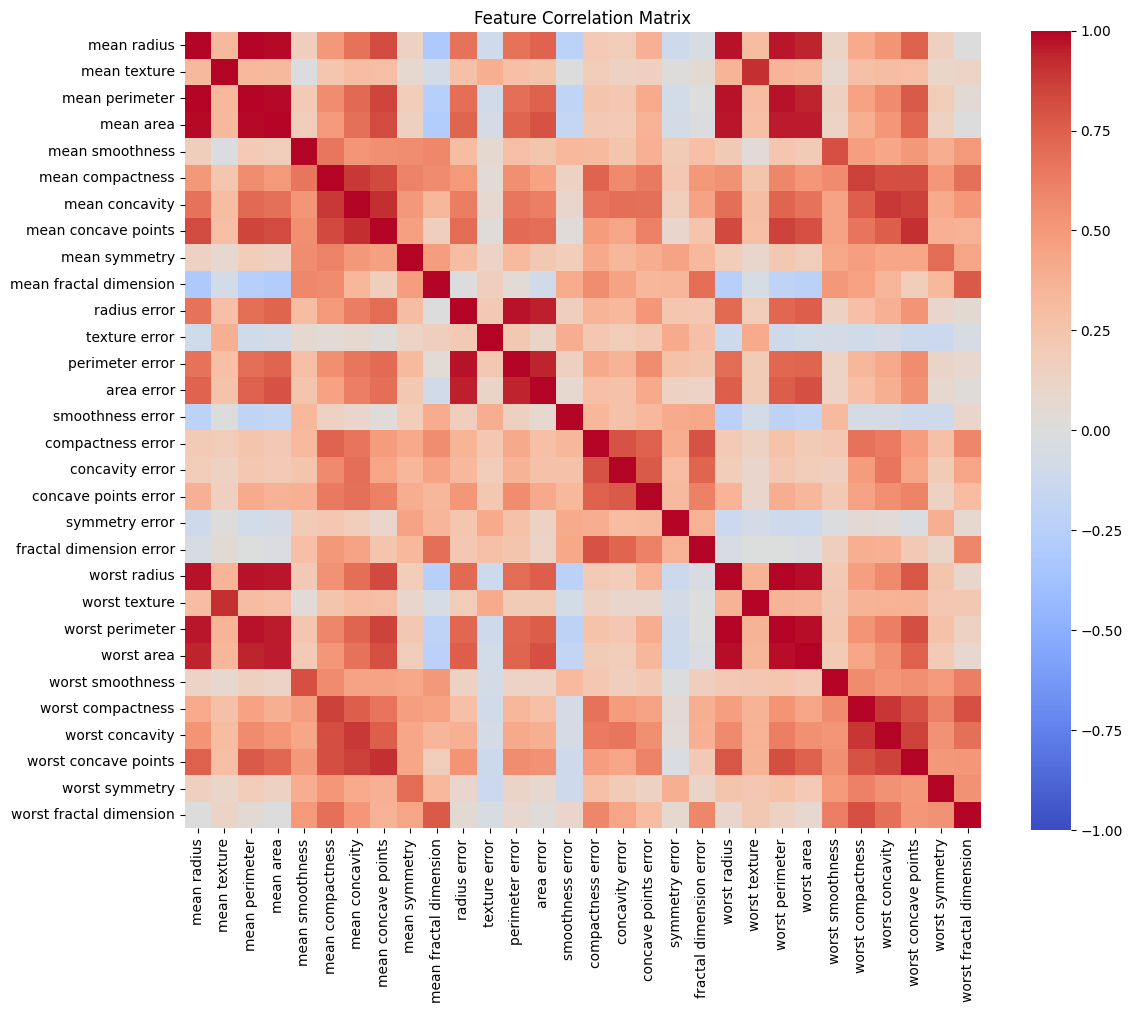

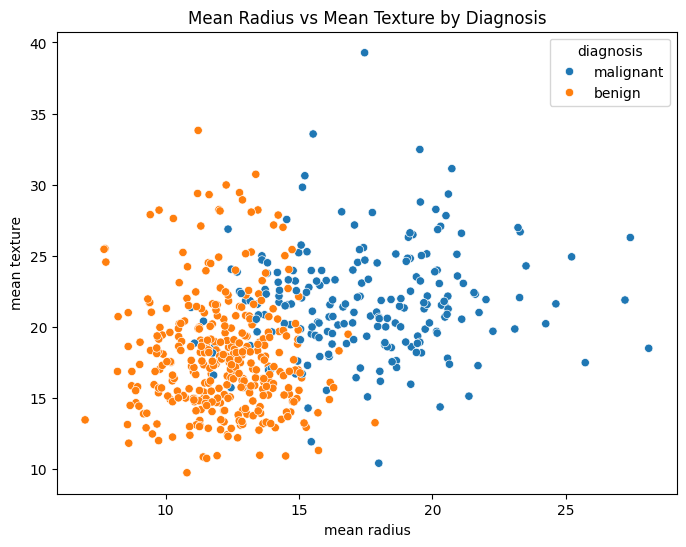

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score

# 1. Load dataset
data = load_breast_cancer(as_frame=True)
df = pd.concat([data.data, data.target.rename('target')], axis=1)
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

print("Dataset shape:", df.shape)
print(df['diagnosis'].value_counts())
print(df.describe())

# 2. Preprocessing - no missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Feature & target
X = data.data
y = data.target

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 6. Train-test split evaluation
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Log Loss (cross-entropy):", log_loss(y, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("Classification Report:\n", classification_report(y, y_pred, target_names=data.target_names))

# 7. 10-Fold Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    acc_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    ll_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_log_loss')
    print(f"\n[name] {name} CV Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"{name} CV Log Loss: {(-ll_scores.mean()):.4f}")

# 8. Visualization - feature correlations
# 8. Visualization - feature correlations
plt.figure(figsize=(12, 10))
corr = df[data.feature_names].corr()
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# 9. Visualization - example: radius mean vs texture mean scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='diagnosis')
plt.title("Mean Radius vs Mean Texture by Diagnosis")
plt.show()
